# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [ ]:
# !pip install tensorflow

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset as train, test features and labels
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

## Visualizing 5 samples of the dataset

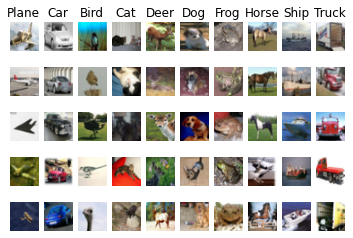

In [ ]:
# Print Grid of all calsses
'''
Label Classes: 
                'Plane',
                'Car',
                'Bird',
                'Cat',
                'Deer',
                'Dog',
                'Frog',
                'Horse',
                'Ship',
                'Truck'
'''

classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_classes = len(classes)
samples_per_class = 5

for j, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == j)
    idxs = np.random.choice(idxs, samples_per_class)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + j + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Sampling the dataset with the same number of the values in each class

In [ ]:
X_train_s, _, y_train_s, _ = train_test_split(
    X_train, y_train, stratify=y_train,train_size=0.2, random_state=42)

X_test_s, _, y_test_s, _ = train_test_split(
    X_test, y_test, stratify=y_test,train_size=0.2, random_state=42)

In [ ]:
X_train_s.shape

(10000, 32, 32, 3)

In [ ]:
y_train_s.shape

(10000, 1)

In [ ]:
# Check for number of unique classes in each class to ensure that the data is balanced
np.unique(y_train_s, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [ ]:
X_test_s.shape

(2000, 32, 32, 3)

In [ ]:
y_test_s.shape

(2000, 1)

In [ ]:
np.unique(y_test_s, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200]))

## Normalization

In [ ]:
# Reduce pixel values
X_train_s = X_train_s / 255.0
X_test_s = X_test_s / 255.0

In [ ]:
# flatten the label values
y_train_s, y_test_s = y_train_s.flatten(), y_test_s.flatten()

## Conclusion

* In this part I load the data from Tensorflow.keras.
* The data contains 60000 samples, and split it into 50000 training, and 10000 testing.
* As it takes alot to train models using this big data, I sample the data into smapler set, with the same number of values in each class.
* I normalize the pixel values of images between 0 and 1 by dividing it by 255.
* Also I flatten the data.

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




In [ ]:
# Write your KNN class here

In [ ]:
# K Neares Neighbor class that returns predictions for your test set
class KNN:
    def __init__(self, k=3):
        self.k = k

    # euclidean distance metric
    def _get_euclidean_distance(self, x1, x2):
        # calculate euclidean distance for a row pair
        sum_squared_distance = np.sum((x1 - x2)**2)
        return np.sqrt(sum_squared_distance)
    # Train function
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    # Prediction
    def predict(self, X_test):
        # get predictions for every row in test data
        y_pred = [self._get_single_prediction(x_test_row) for x_test_row in X_test]
        return np.array(y_pred)

    def _get_single_prediction(self, x_test_row):
        # get distances of test_row vs all training rows
        distances = [self._get_euclidean_distance(x_test_row, x_train_row) 
                     for x_train_row in self.X_train]
        # get indices of k-nearest neighbors -> k-smallest distances
        k_idx = np.argsort(distances)[:self.k]
        # get corresponding y-labels of training data
        k_labels = [self.y_train[idx] for idx in k_idx]
        # return most common label
        return np.argmax(np.bincount(k_labels))
        
    # Compute accuracy
    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
k = 3
clf = KNN(k=k)
clf.fit(X_train_s ,y_train_s)
predictions = clf.predict(X_test_s)

In [ ]:
score = clf.accuracy(y_test_s, predictions)

In [ ]:
# print accuracy 
print("Accuracy",score * 100 )

Accuracy 26.150000000000002


## Choose best K

In [ ]:
errors = []
Accurs = [] 

for k in [1,3,5,7,9,13,17,23]:
    Knn = KNN(k=k)
    Knn.fit(X_train_s ,y_train_s)
    prediction = Knn.predict(X_test_s)
    accr = Knn.accuracy(y_test_s, prediction)
    Accurs.append(accr)
    error = np.mean(prediction != y_test_s)
    errors.append(error)
    print('At K= ', k)
    print("Accuracy =", accr)
    print("Error =", error)
    print("#################################################")
 

At K=  1
Accuracy = 0.292
Error = 0.708
#################################################
At K=  3
Accuracy = 0.2615
Error = 0.7385
#################################################
At K=  5
Accuracy = 0.279
Error = 0.721
#################################################
At K=  7
Accuracy = 0.2915
Error = 0.7085
#################################################
At K=  9
Accuracy = 0.2835
Error = 0.7165
#################################################
At K=  13
Accuracy = 0.2895
Error = 0.7105
#################################################
At K=  17
Accuracy = 0.2925
Error = 0.7075
#################################################
At K=  23
Accuracy = 0.2915
Error = 0.7085
#################################################


## Plot error vs. K values

Minimum Error:- 0.7075 at K = 7


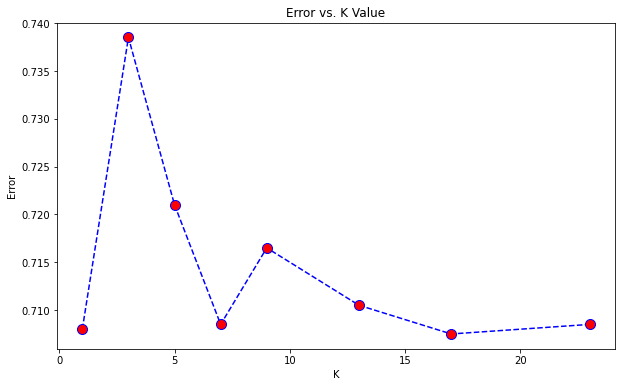

In [ ]:
plt.figure(figsize=(10,6))

plt.plot([1,3,5,7,9,13,17,23],errors,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')
print("Minimum Error:-",min(errors),"at K =",errors.index(min(errors))+1)   

## Plot Acuracy vs. K values

Maximum Accuracy:- 0.2925 at K = 17


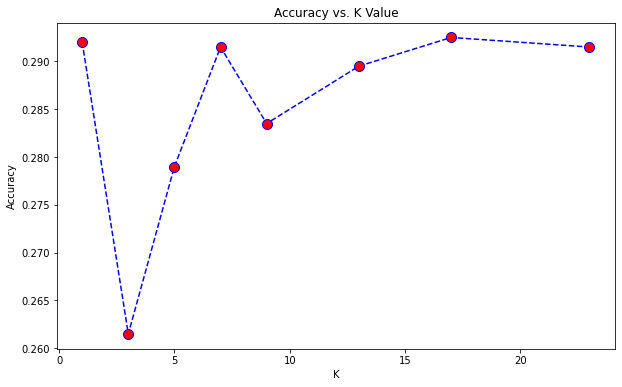

In [ ]:
plt.figure(figsize=(10,6))
k =[1,3,5,7,9,13,17,23]
plt.plot([1,3,5,7,9,13,17,23],Accurs,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum Accuracy:-",max(Accurs),"at K =",k[Accurs.index(max(Accurs))])  

* I used accuracy and error to help me choice the best K value, and both said the same thiang, that K is the best value.

## Train KNN at best K

In [ ]:
Knn = KNN(k=7)
Knn.fit(X_train_s ,y_train_s)
prediction = Knn.predict(X_test_s)
accr = Knn.accuracy(y_test_s, prediction)

## Confusion matrix

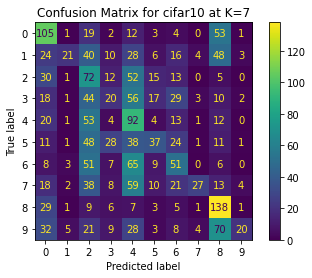

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_s, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(y_test_s))

cm_display.plot()
plt.title('Confusion Matrix for cifar10 at K=7')
plt.show()

* We have 200 value for each class, The confuison matrix says that the model is able to predict the class eight better than other classes as it manages to predict 138 images correctly, and managed to predict 105 imagess of 0 class colrecttly.
* But the other classes correct predict was less than the half of the total values in a single class.
* The class that the model was confused with the most is class 3, as it only manages to predict 21 images.

##Conclusion

* In this part I create a Knn function that take k and calculate the nearest k neighbours using euclidean distance, this distance is the most widely used distance metric and it is the default metric in SKlearn library.
* I used a random K = 3, and calculate score, = 26.15, and predictions.
* Then I used different values of K, to find the best value of it, using the accuracy and error rate, and plot both with the number of K and compare the values and found out that when K=7, we have the best accuracy and the less error.
* Finally, I train my Knn model using k=7 and get the predictions and plot the confusion matrix.

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [ ]:
# Write your logistic regression code here.
from sklearn.linear_model import LogisticRegression
from numpy import argmax
from numpy import asarray
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# I had an error when running the code with the original data shape, so I have to reshape it.
nsamples, nx, ny, nz = X_train_s.shape
d2_train_dataset = X_train_s.reshape((nsamples,nx*ny*nz))
nsampless, nxx, nyy, nzz = X_test_s.shape
d2_test_dataset = X_test_s.reshape((nsampless,nxx*nyy*nzz))

In [ ]:
# OvR function to calculate the logistic regression for each class vs rest.
def OvR(r):
    y_train_r = [[1] if i == r else [0] for i in y_train_s ]
    y_test_r = [[1] if i == r else [0] for i in y_test_s ]
    LR = LogisticRegression(random_state=0, max_iter=1000).fit(d2_train_dataset, np.ravel(y_train_r,order='C'))
    pre = LR.predict_proba(d2_test_dataset)[:,1]
    return pre

0 VS. All

In [ ]:
OVR0 = OvR(0)

1 VS. All

In [ ]:
OVR1 = OvR(1)

2 VS. All


In [ ]:
OVR2 = OvR(2)

3 VS. All


In [ ]:
OVR3 = OvR(3)

4 VS. All

In [ ]:
OVR4 = OvR(4)

5 VS. All

In [ ]:
OVR5 = OvR(5)

6 VS. All

In [ ]:
OVR6 = OvR(6)

7 VS. All

In [ ]:
OVR7 = OvR(7)

8 VS. All

In [ ]:
OVR8 = OvR(8)

9 VS. All

In [ ]:
OVR9 = OvR(9)

In [ ]:
# Array of all probabilities
probs = asarray([OVR0, OVR1,OVR2, OVR3, OVR4,OVR5,OVR6,OVR7,OVR8,OVR9])
probs.shape

(10, 2000)

### Argmax probabilities

In [ ]:
result = argmax(probs, axis=0)

In [ ]:
# The predicted classes
result

array([6, 6, 7, ..., 9, 5, 6], dtype=int64)

In [ ]:
# The accuracy of argmax
accuracy_score(y_test_s, result)

0.2845

## Confiuson matrix

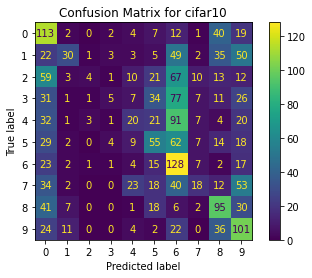

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_s, result)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(y_test_s))

cm_display.plot()
plt.title('Confusion Matrix for cifar10')
plt.show()

* We have 200 value for each class, The confuison matrix says that the model is able to predict the class six better than other classes as it manages to predict 128 images correctly, and managed to predict 113  Imagess of 0 class colrecttly, like the previous model it made a good performance with this class, and is better with class 9 than the last model with 101 corect predictions.

* But the other classes correct predict was less than the half of the total values in a single class.

* The classes that the model was confused with the most is class 2, as it only manages to predict 4 images.

## Conclusion

* In this part I use Logistic Regression model from Sklearn library, and as logistic regression is binary classification and our problem is muliclass classification, we need to use OvR.
* In OvR part, I made the label of the class I want to predict = 1 and other classses = 0, and use Logistic regression to predict the output and calculate the probabilities, and finally we have 10 models.
* Then I get the argmax of these 10 models, and compare its predictions with the true predictions and plot the confusion matrix.



## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [ ]:
# Run your SVM experiments here.
from sklearn import svm

## SVM Baseline with LinearSVC

In [ ]:
base_clf = svm.LinearSVC(multi_class='ovr', dual = False)
base_clf.fit(d2_train_dataset, np.ravel(y_train_s,order='C'))
pre_svm = base_clf.predict(d2_test_dataset)
accr_svm = base_clf.score(d2_test_dataset, np.ravel(y_test_s,order='C'))

In [ ]:
accr_svm

0.2815

## Different cost patameter values

In [ ]:
Accurs_svm = []
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for c in Cs:
    lin_clf = svm.LinearSVC(multi_class='ovr', dual = False, C = c)
    lin_clf.fit(d2_train_dataset, np.ravel(y_train_s,order='C'))
    pre_svm = lin_clf.predict(d2_test_dataset)
    accr_svm = lin_clf.score(d2_test_dataset, np.ravel(y_test_s,order='C'))
    Accurs_svm.append(accr_svm)
    print('At C= ', c)
    print("Accuracy =", accr_svm)

At C=  0.0001
Accuracy = 0.158
At C=  0.001
Accuracy = 0.2425
At C=  0.01
Accuracy = 0.255
At C=  0.1
Accuracy = 0.2915
At C=  1
Accuracy = 0.3405
At C=  10
Accuracy = 0.369
At C=  100
Accuracy = 0.3785
At C=  1000
Accuracy = 0.359


In [ ]:
# Accuracies at different Cs.
Accurs_svm

[0.158, 0.2425, 0.255, 0.2915, 0.3405, 0.369, 0.3785, 0.359]

Maximum Accuracy:- 0.3785 at C = 100


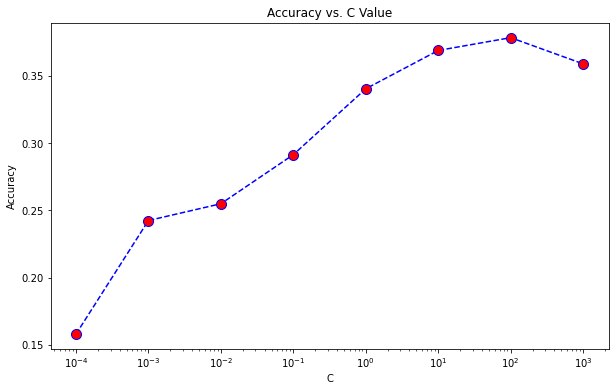

In [ ]:
# Accuracies vs C values plot.

plt.figure(figsize=(10,6))
plt.plot(Cs,Accurs_svm,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

print("Maximum Accuracy:-",max(Accurs_svm),"at C =",Cs[Accurs_svm.index(max(Accurs_svm))])

 ## L1 regularization

In [ ]:
Accurs_svm_reg = []
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in Cs:
    lin_clf = svm.LinearSVC(multi_class='ovr', dual = False, penalty='l1', C = c)
    lin_clf.fit(d2_train_dataset, np.ravel(y_train_s,order='C'))
    pre_svm_reg = lin_clf.predict(d2_test_dataset)
    accr_svm_reg = lin_clf.score(d2_test_dataset, np.ravel(y_test_s,order='C'))
    Accurs_svm_reg.append(accr_svm_reg)
    print('At C= ', c)
    print("Accuracy =", accr_svm_reg)


At C=  0.0001
Accuracy = 0.1
At C=  0.001
Accuracy = 0.173
At C=  0.01
Accuracy = 0.3325
At C=  0.1
Accuracy = 0.3705
At C=  1
Accuracy = 0.315
At C=  10
Accuracy = 0.2935
At C=  100
Accuracy = 0.289
At C=  1000
Accuracy = 0.288


Maximum Accuracy:- 0.3705 at C = 0.1


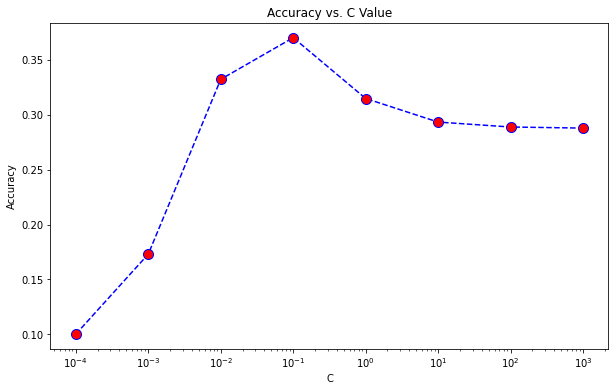

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Cs,Accurs_svm_reg,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

print("Maximum Accuracy:-",max(Accurs_svm_reg),"at C =",Cs[Accurs_svm_reg.index(max(Accurs_svm_reg))])

## Cost and gamma different values

In [ ]:
from sklearn.svm import SVC

In [ ]:

Accurs_svm_gC = []
for cost in [0.01, 0.1, 1, 10, 100]:
  for gamma in [0.01, 0.1, 1, 10, 100]:
      lin_clf = SVC(gamma=gamma, C = cost)
      lin_clf.fit(d2_train_dataset, np.ravel(y_train_s,order='C'))
      pre_svm = lin_clf.predict(d2_test_dataset)
      accr_svm = lin_clf.score(d2_test_dataset, np.ravel(y_test_s,order='C'))
      Accurs_svm_gC.append(accr_svm)
      print('At C= ', cost, 'and At gamma =', gamma)
      print("Accuracy =", accr_svm)

At C=  0.01 and At gamma = 0.01
Accuracy = 0.259
At C=  0.01 and At gamma = 0.1
Accuracy = 0.1055
At C=  0.01 and At gamma = 1
Accuracy = 0.1015
At C=  0.01 and At gamma = 10
Accuracy = 0.212
At C=  0.01 and At gamma = 100
Accuracy = 0.1
At C=  0.1 and At gamma = 0.01
Accuracy = 0.3615
At C=  0.1 and At gamma = 0.1
Accuracy = 0.1055
At C=  0.1 and At gamma = 1
Accuracy = 0.1015
At C=  0.1 and At gamma = 10
Accuracy = 0.2125
At C=  0.1 and At gamma = 100
Accuracy = 0.1
At C=  1 and At gamma = 0.01
Accuracy = 0.476
At C=  1 and At gamma = 0.1
Accuracy = 0.1725
At C=  1 and At gamma = 1
Accuracy = 0.1025
At C=  1 and At gamma = 10
Accuracy = 0.213
At C=  1 and At gamma = 100
Accuracy = 0.1
At C=  10 and At gamma = 0.01
Accuracy = 0.465
At C=  10 and At gamma = 0.1
Accuracy = 0.189
At C=  10 and At gamma = 1
Accuracy = 0.103
At C=  10 and At gamma = 10
Accuracy = 0.213
At C=  10 and At gamma = 100
Accuracy = 0.1
At C=  100 and At gamma = 0.01
Accuracy = 0.4665
At C=  100 and At gamma = 0.1

* I choose the maximum accuracy from each gamma and C values combinations.

Maximum Accuracy:- 0.476 at C = 1


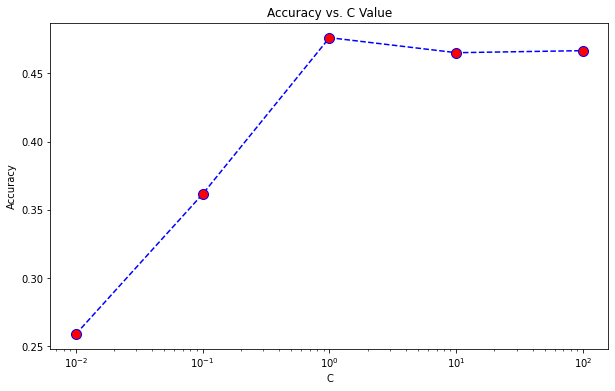

In [ ]:
plt.figure(figsize=(10,6))
Accurs_svm_gC_best = [.259, 0.3615, 0.476, 0.465, 0.4665]
Cs = [0.01, 0.1, 1, 10, 100]
plt.plot([0.01, 0.1, 1, 10, 100],Accurs_svm_gC_best,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

print("Maximum Accuracy:-",max(Accurs_svm_gC_best),"at C =",Cs[Accurs_svm_gC_best.index(max(Accurs_svm_gC_best))])

## Confuion matrix

### The model with best accuracy  

In [ ]:
lin_clf = SVC(gamma=.01, C = 1)
lin_clf.fit(d2_train_dataset, np.ravel(y_train_s,order='C'))
pre_svm_best = lin_clf.predict(d2_test_dataset)
accr_svm_best = lin_clf.score(d2_test_dataset, np.ravel(y_test_s,order='C'))

In [ ]:
accr_svm_best

0.476

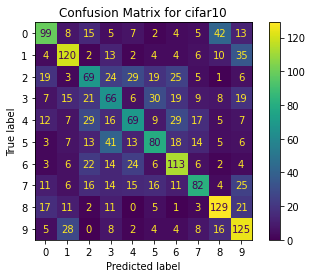

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_s, pre_svm_best)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(y_test_s))

cm_display.plot()
plt.title('Confusion Matrix for cifar10')
plt.show()

* We have 200 value for each class, The confuison matrix says that the model is able to predict the class eight better than other classes as it manages to predict 129 images correctly, and managed to predict 125 imagess of 9 class correctly.

* But the other classes correct predict was less than the half of the total values in a single class.

* The class that the model was confused with the most is class 3, as it only manages to predict 66 images.

## Conclusion
In this part we used SVM from SCikit-learn, which can handel multiclass classification,
I make different experience:
* Build a baseline modsel using LinearSVC() function, and its output was 28.15%
* Then I used different values for cost parameter and explore the effect of it on the model accuracy, and find out:
  --> The best accuracy is 37.85% when C = 100, and show the plot of accuracy vs. C-parameter.
  --> I plot the results as an accuracy vs. C-parameter curve on a logarithmic scale

* In another experiment, I add L1 regularization, and plot the find out that the best accuracy reached 37.05%, which shows no improvement.
  --> again, I plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.

* In the final experiment, I used different combination of cost and gamma,
  --> I draw the confuision matrix for the prediction of model that has the best performance.
  and plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.
  --> find out that the best combination is when gamma = .01 and C= 1

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

K-NN:
1. With random K = 3, the KNN model with euclidean distance metric, the accuracy = 26.15%.
2. After train the model with different values of K, the best accuracy was 29.25% with k = 17.
3. The class the model was able to detect the best was class 8.

Logistic Regression:
1. The argmax of all 10 models computed from the OvR has an accuracy = 28.45, which is worse than KNN.
2. The class the model was able to detect the best was class 6.

SVM:
1. The baseline model (LinearSVC()) has accuracy = 28.15 which is worse than the previous models.
2. When training differnt values of C, the best accuracy was = 37.58, at C = 100, which is better than the previous models.
3. By adding L1 regularization, and train with different values of C, the best accuracy was = 37.05, at C = .1, which is worse than before using it.
4. When exploring the differnt values of Cost and gamma, the best accuracy was = 47.6, at C = 1 and gamma = .01, which is worse than before using it.


--> I also add comments after each part above.

<!-- Write your conclusion here -->